In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
df=pd.read_csv("dhama2")
df.head()

,Antenna_Height,Power,Gain,RCS,Sea_State,Rainfall_Rate,Target_Radial_Velocity,Pulses_Burst,Range,Detection_Probability
0,30,400,38,1,1,0,5,1,0.904523,97.1050
1,30,400,38,1,1,0,5,1,1.206030,99.9959
2,30,400,38,1,1,0,5,1,1.507540,99.9913
3,30,400,38,1,1,0,5,1,1.809050,89.0591
4,30,400,38,1,1,0,5,1,2.110550,99.9015


In [6]:
x=df[['Antenna_Height','Power','Gain','RCS','Sea_State','Rainfall_Rate','Target_Radial_Velocity','Pulses_Burst','Range','Detection_Probability']].values
x

array([[  30.      ,  400.      ,   38.      , ...,    1.      ,
           0.904523,   97.105   ],
       [  30.      ,  400.      ,   38.      , ...,    1.      ,
           1.20603 ,   99.9959  ],
       [  30.      ,  400.      ,   38.      , ...,    1.      ,
           1.50754 ,   99.9913  ],
       ...,
       [ 200.      ,  100.      ,   29.      , ...,    8.      ,
          59.397   , -100.      ],
       [ 200.      ,  100.      ,   29.      , ...,    8.      ,
          59.6985  , -100.      ],
       [ 200.      ,  100.      ,   29.      , ...,    8.      ,
          60.      , -100.      ]])

In [7]:
y=df['Detection_Probability'].values
y

array([  97.105 ,   99.9959,   99.9913, ..., -100.    , -100.    ,
       -100.    ])

In [8]:
# Définir la fonction pour filtrer les valeurs
def filter_values(y):
    return [1 if i >= 0.7 else 0 for i in y]

# Appliquer la fonction sur les données de la colonne 'Detection Probability'
filtered_values = filter_values(df['Detection_Probability'])

# Ajouter la colonne de valeurs filtrées à votre DataFrame
df['filtered_values'] = filtered_values

# Afficher le tableau mis à jour
df.head()

,Antenna_Height,Power,Gain,RCS,Sea_State,Rainfall_Rate,Target_Radial_Velocity,Pulses_Burst,Range,Detection_Probability,filtered_values
0,30,400,38,1,1,0,5,1,0.904523,97.1050,1
1,30,400,38,1,1,0,5,1,1.206030,99.9959,1
2,30,400,38,1,1,0,5,1,1.507540,99.9913,1
3,30,400,38,1,1,0,5,1,1.809050,89.0591,1
4,30,400,38,1,1,0,5,1,2.110550,99.9015,1


In [9]:
x=df[['Antenna_Height','Power','Gain','RCS','Sea_State','Rainfall_Rate','Target_Radial_Velocity','Pulses_Burst','Range','Detection_Probability']].values
y=df['filtered_values'].values


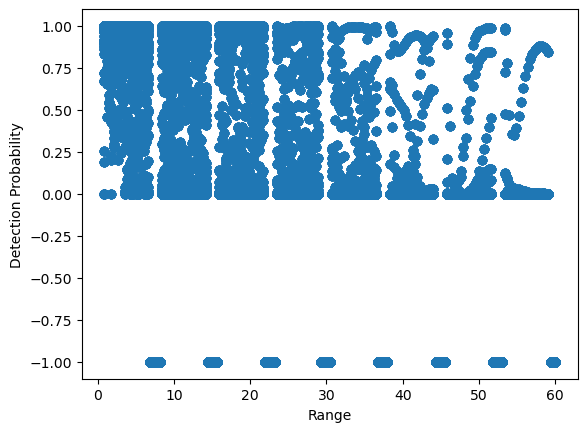

In [10]:
import matplotlib.pyplot as plt

X = df.Range
Y = df.Detection_Probability/100

plt.scatter(X, Y)
plt.xlabel('Range')
plt.ylabel('Detection Probability')
plt.show()


In [11]:
from sklearn.impute import SimpleImputer

# Create an imputer object with 'mean' strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the training data
imputer.fit(df)

SimpleImputer()

In [30]:
df.head()

,Antenna_Height,Power,Gain,RCS,Sea_State,Rainfall_Rate,Target_Radial_Velocity,Pulses_Burst,Range,Detection_Probability,filtered_values
0,30,400,38,1,1,0,5,1,0.904523,97.1050,1
1,30,400,38,1,1,0,5,1,1.206030,99.9959,1
2,30,400,38,1,1,0,5,1,1.507540,99.9913,1
3,30,400,38,1,1,0,5,1,1.809050,89.0591,1
4,30,400,38,1,1,0,5,1,2.110550,99.9015,1


In [31]:
df.describe()


,Antenna_Height,Power,Gain,RCS,Sea_State,Rainfall_Rate,Target_Radial_Velocity,Pulses_Burst,Range,Detection_Probability,filtered_values
count,94560.000000,94560.000000,94560.000000,94560.00000,94560.000000,94560.000000,94560.000000,94560.000000,94559.000000,94560.000000,94560.000000
mean,100.000000,250.000000,33.500751,222.80000,2.000000,2.000000,10.000000,4.500000,29.968255,1.438375,0.294184
std,72.572187,150.000793,4.505193,390.36364,1.000005,2.000011,5.000026,3.500019,17.404951,60.831179,0.455677
min,30.000000,100.000000,29.000000,1.00000,1.000000,0.000000,5.000000,1.000000,0.904523,-100.000000,0.000000
25%,30.000000,100.000000,29.000000,3.00000,1.000000,0.000000,5.000000,1.000000,14.773900,0.000100,0.000000
50%,70.000000,250.000000,38.000000,10.00000,2.000000,2.000000,10.000000,4.500000,29.849200,0.000106,0.000000
75%,200.000000,400.000000,38.000000,100.00000,3.000000,4.000000,15.000000,8.000000,44.924600,12.087625,1.000000
max,200.000000,400.000000,100.000000,1000.00000,3.000000,4.000000,15.000000,8.000000,60.000000,100.000000,1.000000


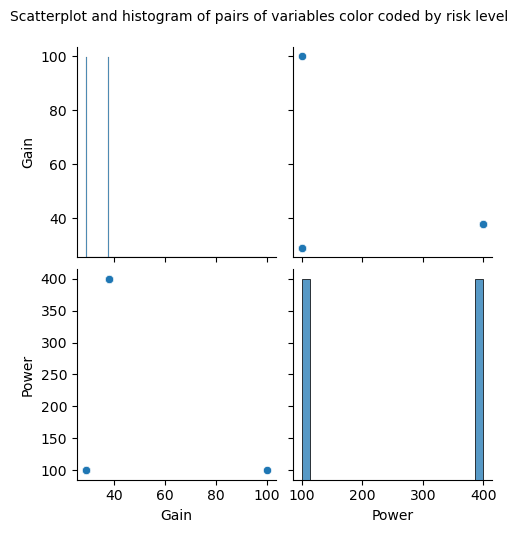

In [19]:
g=sns.pairplot(data=df, vars=['Gain','Power'])
g.fig.suptitle("Scatterplot and histogram of pairs of variables color coded by risk level", 
               fontsize = 10, # defining the size of the title
               y=1.05); 

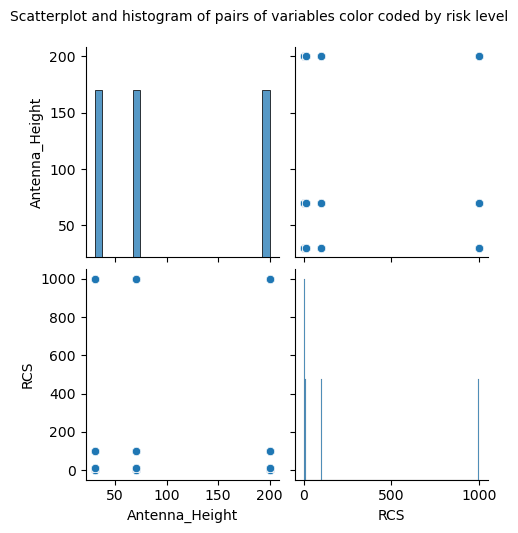

In [12]:
g=sns.pairplot(data=df, vars=['Antenna_Height','RCS'])
g.fig.suptitle("Scatterplot and histogram of pairs of variables color coded by risk level", 
               fontsize = 10, # defining the size of the title
               y=1.05); 

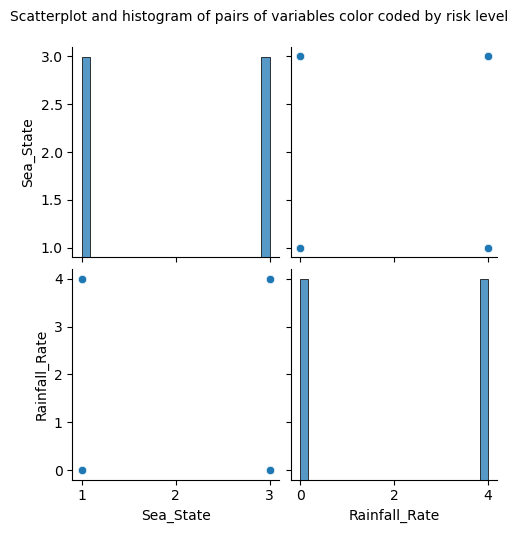

In [13]:
g=sns.pairplot(data=df, vars=['Sea_State','Rainfall_Rate'])
g.fig.suptitle("Scatterplot and histogram of pairs of variables color coded by risk level", 
               fontsize = 10, # defining the size of the title
               y=1.05); 

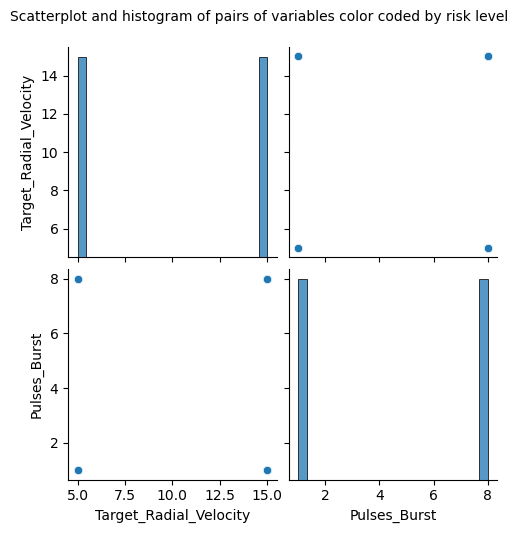

In [14]:
g=sns.pairplot(data=df, vars=['Target_Radial_Velocity','Pulses_Burst'])
g.fig.suptitle("Scatterplot and histogram of pairs of variables color coded by risk level", 
               fontsize = 10, # defining the size of the title
               y=1.05); 

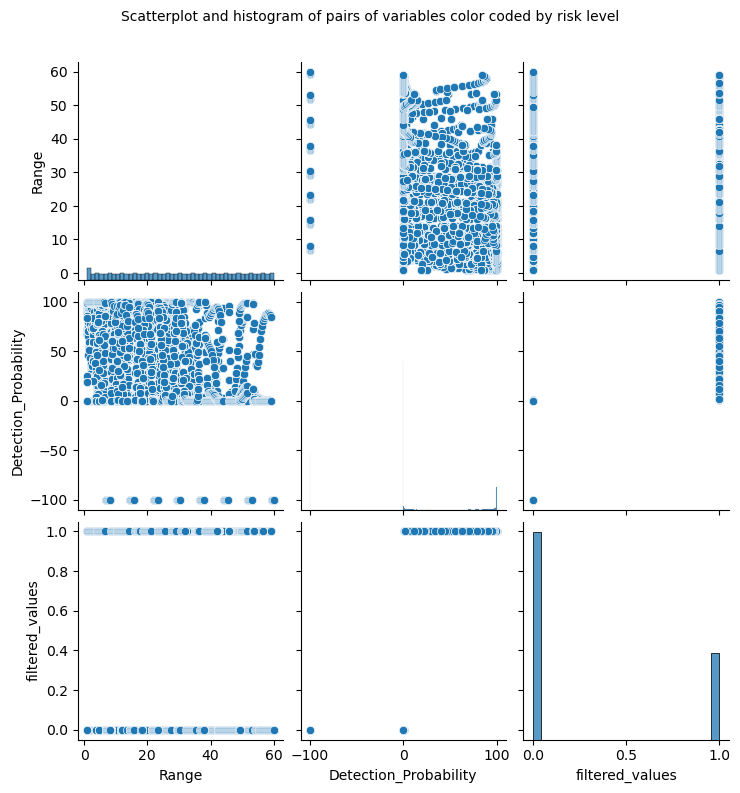

In [15]:
g=sns.pairplot(data=df, vars=['Range','Detection_Probability','filtered_values'])
g.fig.suptitle("Scatterplot and histogram of pairs of variables color coded by risk level", 
               fontsize = 10, # defining the size of the title
               y=1.05); 

REGRESSION LOGISTIC

In [32]:
#diviser les données en base d'apprentissage et test (20% test 80% apprentissage)
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state =100 )

In [34]:
from sklearn.impute import SimpleImputer

# Create an imputer object with 'mean' strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the training data
imputer.fit(x_train)

# Transform both training and testing data
x_train = imputer.transform(x_train)
x_test = imputer.transform(x_test)

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
lr = LogisticRegression(C = 0.1, solver = 'liblinear')
lr.fit(x_train,y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [36]:
print('score=',lr.score(x_train,y_train)) # R carré (le coefficient de détermination) avec
#la fonction score
print('coef b =',lr.coef_) #b1,b2,b3,b4,b5,b6,b7,b8,b9,b10
print('b0=',lr.intercept_) #b0

score= 0.9982021996615905
coef b = [[ 2.91300963e-03  6.86576132e-03 -1.81289011e-01  1.31730815e-03
  -8.05838778e-02  2.20588157e-02 -7.61864649e-03  1.01442161e-02
  -6.37100624e-02  6.18918537e+00]]
b0= [-0.00698064]


In [37]:
# une analyse summary avec la commande Logit pour obtenir les détails de la régression
import statsmodels.api as smi
model = smi.Logit(y_train, x_train)
results = model.fit()
print(results.summary())

D:\anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


         Current function value: 0.000001
         Iterations: 35


D:\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                75648
Model:                          Logit   Df Residuals:                    75638
Method:                           MLE   Df Model:                            9
Date:                Wed, 24 May 2023   Pseudo R-squ.:                   1.000
Time:                        00:37:20   Log-Likelihood:               -0.10133
converged:                      False   LL-Null:                       -45771.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0051      0.107     -0.048      0.962      -0.214       0.204
x2             0.2421      0.139      1.746      0.081      -0.030       0.514
x3            -7.3229      4.369     -1.676      0.0

D:\anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [38]:
#Le critère d'information d'Akaike s'écrit comme suit :AIC = 2k − 2 ln(L)
#où k est le nombre de paramètres à estimer du modèle et L est le maximum de la fonction de vraisemblance du modèle.
#AIC = 2k − 2 ln(L)
print(results.aic)
print(results.bic)

20.202652836912918
112.54111565017006


In [39]:
import statsmodels.api as smi
model = smi.Probit(y_train, x_train)
results = model.fit()
print(results.summary())

         Current function value: 0.000230
         Iterations: 35


D:\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                75648
Model:                         Probit   Df Residuals:                    75638
Method:                           MLE   Df Model:                            9
Date:                Wed, 24 May 2023   Pseudo R-squ.:                  0.9996
Time:                        00:37:22   Log-Likelihood:                -17.400
converged:                      False   LL-Null:                       -45771.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0015      0.003      0.535      0.593      -0.004       0.007
x2             0.0326      0.004      7.603      0.000       0.024       0.041
x3            -0.9559      0.114     -8.398      0.0

In [40]:
print(results.aic)
print(results.bic)

54.80092051620669
147.13938332946384


In [41]:
y_pred = lr.predict(x_test) # les valeurs prédites de y_test
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [42]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix # matrice de confusion

array([[13279,     0],
       [   38,  5595]], dtype=int64)

In [43]:
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.9979906937394247


In [44]:
#prédire si radar est detecteé ou non 
elements_des_radar = [[30,400,38,1,1,0,5,1,0.904523,97.1050]]
#Antenna_Height	Power	Gain	RCS	Sea_State	Rainfall_Rate	Target_Radial_Velocity	Pulses_Burst	Range	Detection_Probability
y_predicted = lr.predict(elements_des_radar)
y_predicted

array([1], dtype=int64)

#RNA

In [12]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, Adam

In [13]:
import scipy.stats as stats
import numpy as np
x = np.array(x)
y = np.array(y)
X0 = x
Y0 = y
Xb = np.concatenate((X0, X0), axis=0)
Yb = np.concatenate((Y0, Y0), axis=0)
X11 = Xb[:, 0:4] + stats.norm.rvs(loc=0.5, scale=1, size=(94560 * 2, 4))
X22 = Xb[:, 4:8] + stats.uniform.rvs(size=(94560* 2, 4), loc=0, scale=0.5)
X1 = np.concatenate((X11, X22), axis=1)
X = np.concatenate((Xb, X1), axis=1)
Y = np.concatenate((Yb, Yb), axis=0)


In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3)

In [15]:

n_features = x_train.shape[1]


In [16]:
# Assuming x_train is a NumPy array with shape (n_samples, n_features)
model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(n_features,)),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='mse')


In [17]:
model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(n_features,)),  # Example hidden layer
    keras.layers.Dense(20, activation='relu'),  # Example hidden layer
    keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 20)                220       
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Train the model
history=model.fit(x_train, y_train, epochs=100, batch_size=150, validation_split=0.2)

Epoch 1/100
337/337 [==============================] - 3s 6ms/step - loss: 2.9137 - accuracy: 0.7178 - val_loss: 0.6481 - val_accuracy: 0.7053
Epoch 2/100
337/337 [==============================] - 1s 3ms/step - loss: 0.6249 - accuracy: 0.7059 - val_loss: 0.6117 - val_accuracy: 0.7053
Epoch 3/100
337/337 [==============================] - 1s 4ms/step - loss: 0.6079 - accuracy: 0.7059 - val_loss: 0.6066 - val_accuracy: 0.7053
Epoch 4/100
337/337 [==============================] - 1s 4ms/step - loss: 0.6059 - accuracy: 0.7059 - val_loss: 0.6063 - val_accuracy: 0.7053
Epoch 5/100
337/337 [==============================] - 1s 3ms/step - loss: 0.6058 - accuracy: 0.7059 - val_loss: 0.6063 - val_accuracy: 0.7053
Epoch 6/100
337/337 [==============================] - 1s 4ms/step - loss: 0.6058 - accuracy: 0.7059 - val_loss: 0.6063 - val_accuracy: 0.7053
Epoch 7/100
337/337 [==============================] - 1s 4ms/step - loss: 0.6058 - accuracy: 0.7059 - val_loss: 0.6063 - val_accuracy: 0.7053

Epoch 58/100
337/337 [==============================] - 1s 4ms/step - loss: 0.6058 - accuracy: 0.7059 - val_loss: 0.6063 - val_accuracy: 0.7053
Epoch 59/100
337/337 [==============================] - 1s 3ms/step - loss: 0.6058 - accuracy: 0.7059 - val_loss: 0.6063 - val_accuracy: 0.7053
Epoch 60/100
337/337 [==============================] - 1s 3ms/step - loss: 0.6058 - accuracy: 0.7059 - val_loss: 0.6063 - val_accuracy: 0.7053
Epoch 61/100
337/337 [==============================] - 1s 3ms/step - loss: 0.6058 - accuracy: 0.7059 - val_loss: 0.6063 - val_accuracy: 0.7053
Epoch 62/100
337/337 [==============================] - 1s 3ms/step - loss: 0.6058 - accuracy: 0.7059 - val_loss: 0.6063 - val_accuracy: 0.7053
Epoch 63/100
337/337 [==============================] - 1s 4ms/step - loss: 0.6058 - accuracy: 0.7059 - val_loss: 0.6063 - val_accuracy: 0.7053
Epoch 64/100
337/337 [==============================] - 2s 5ms/step - loss: 0.6058 - accuracy: 0.7059 - val_loss: 0.6063 - val_accuracy:

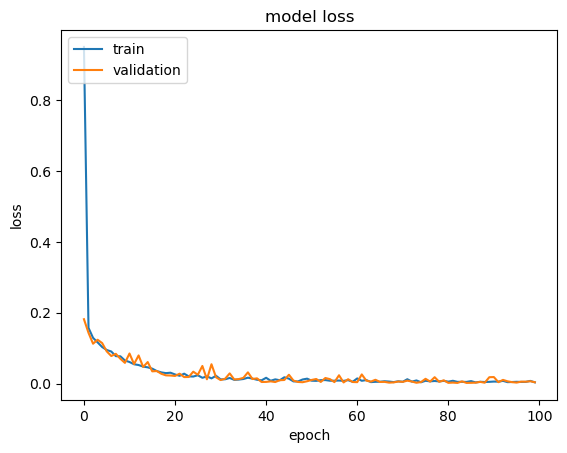

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

In [19]:
pred=np.around(model.predict(x_test),0)
y_pred=pred.astype(int)
np.shape(y_pred)

985/985 [==============================] - 1s 1ms/step


(31520, 1)

In [20]:
# use predict() to get predicted probabilities
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

985/985 [==============================] - 1s 1ms/step


In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

matrice_confusion2 = multilabel_confusion_matrix(y_test,y_pred)
matrice_confusion2

array([[[ 9252,    38],
        [   11, 22219]],

       [[22219,    11],
        [   38,  9252]]], dtype=int64)

In [24]:
from sklearn.impute import SimpleImputer

# Create an imputer object with 'mean' strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the training data
imputer.fit(df)

SimpleImputer()

In [26]:
labelpredict=model.predict(x_test)
labelpredict=labelpredict.round()
labelpredict

985/985 [==============================] - 1s 1ms/step


array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

In [28]:
# Print intermediate values during evaluation
predictions = model.predict(x_test)
print(predictions)

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print(score)
#the loss value is low (0.0020796412136405706), and the accuracy is high (0.9990482330322266).
#These values suggest that your model is performing well on the test data.

985/985 [==============================] - 1s 1ms/step
[[1.00788355e-07]
 [8.64964724e-01]
 [1.39047834e-05]
 ...
 [1.00000000e+00]
 [6.12618521e-07]
 [9.99995708e-01]]
[0.004155558999627829, 0.998445451259613]


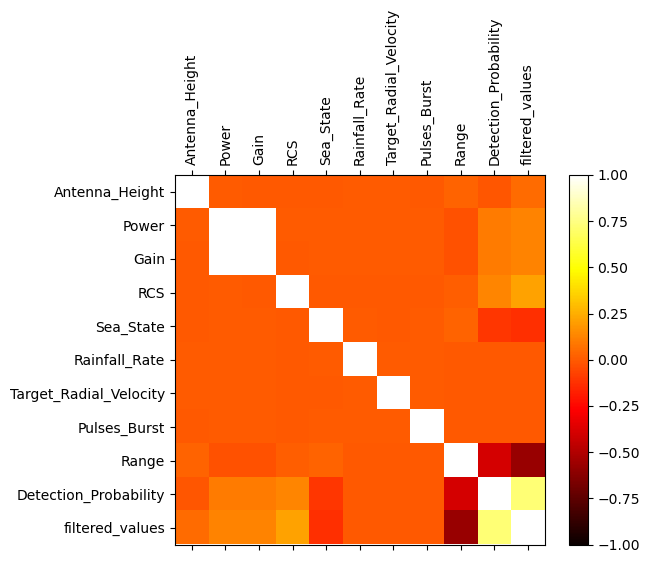

In [29]:
correlation = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation,cmap='hot', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()
#On remarque que la variable "target" est positivement corrélée avec les variables cp, restecg, thalach et slope. Elle est négativement corrélée avec les variables exang, oldpeak et ca. Pour réaliser l'apprentissage dans le but de classifier les données, on va uniquement travailler avec les sept variables explicatives précédentes.

_______________________________________________________________________

SVM

In [55]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [56]:
import numpy as np
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Reshape data
n_samples_train = X_train.shape[0]
X_train = X_train.reshape(n_samples_train, -1)

n_samples_test = X_test.shape[0]
X_test = X_test.reshape(n_samples_test, -1)

# Create SVM models with different kernels
rbf_model = svm.SVC(kernel='rbf', gamma=0.5, C=0.1)
poly_model = svm.SVC(kernel='poly', degree=3, C=1)
#find the best hyperparameters for a classification problem using a support vector machine (SVM) with an RBF kernel.
# Fit models to the training data
rbf_model.fit(X_train, y_train)
poly_model.fit(X_train, y_train)

# Predict classes for test data
rbf_pred = rbf_model.predict(X_test)
poly_pred = poly_model.predict(X_test)

# Evaluate accuracy of predictions
rbf_acc = accuracy_score(y_test, rbf_pred)
poly_acc = accuracy_score(y_test, poly_pred)


In [57]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  97.78
F1 (Polynomial Kernel):  97.79


In [58]:
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  97.78
F1 (RBF Kernel):  97.79


In [82]:
from sklearn.metrics import confusion_matrix

matrice_confusion2_rbf = confusion_matrix(y_test, rbf_pred)
matrice_confusion2_poly = confusion_matrix(y_test, poly_pred)
print(matrice_confusion2_rbf, '=matrice_confusion2_rbf')
print(matrice_confusion2_poly, '=matrice_confusion2_poly')

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]] =matrice_confusion2_rbf
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]] =matrice_confusion2_poly


# model 3 :RandomForestRegressor

In [79]:
#On importe l'algorithme à partir de sklearn
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor(n_estimators = 100, random_state = 2020)
#Et on lance le training sur notre dataset de train
model3.fit(X_train, y_train)

RandomForestRegressor(random_state=2020)

In [80]:
#On applique le modèle que l'on vient 
#d'entraîner sur l'échantillon de test
y3_pred = model3.predict(X_test)
#predictions
Y3_pred=y3_pred.astype(int)
Y3_pred
np.shape(Y3_pred)

(45,)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.82      1.00      0.90        18
           2       1.00      0.64      0.78        11

    accuracy                           0.91        45
   macro avg       0.94      0.88      0.89        45
weighted avg       0.93      0.91      0.91        45



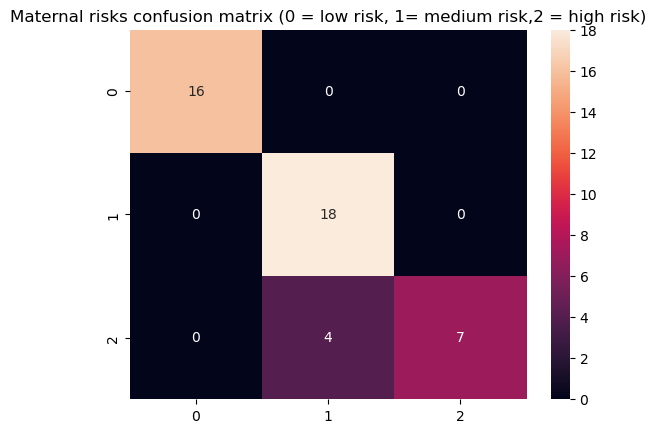

In [81]:
from sklearn.metrics import classification_report, confusion_matrix
matrice_confusion3 = confusion_matrix(y_test, Y3_pred)
matrice_confusion3
sns.heatmap(matrice_confusion3, annot=True, fmt='d').set_title('Maternal risks confusion matrix (0 = low risk, 1= medium risk,2 = high risk)')
print(classification_report(y_test,Y3_pred))


# Model4 : KMeans

In [166]:
from sklearn.cluster import KMeans
from  sklearn import datasets

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

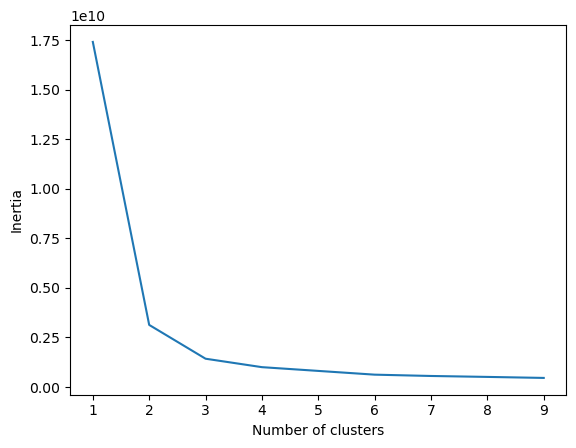

In [167]:
from sklearn.impute import SimpleImputer

# impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df)

# run KMeans on the imputed data
tab = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_imputed)
    tab.append(kmeans.inertia_)
plt.plot(range(1,10),tab)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [168]:
y_pred

array([ 0.15515656,  0.12504771,  0.06684996, ...,  1.17211499,
       -0.30813362,  0.08747792])

In [169]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer



# impute missing values
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# apply KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_imputed)


D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [170]:
print(kmeans.cluster_centers_)

[[ 1.00000000e+02  4.00000000e+02  3.80000000e+01  2.85000000e+01
   2.00000000e+00  2.00000000e+00  1.00000000e+01  4.50000000e+00
   2.92422415e+01  3.88878519e+00  3.06736464e-01]
 [ 1.00000000e+02  2.50000000e+02  3.35000000e+01  1.00000000e+03
   2.00000000e+00  2.00000000e+00  1.00000000e+01  4.50000000e+00
   3.04522620e+01  1.62706373e+01  4.76734349e-01]
 [ 1.00000000e+02  1.00000000e+02  2.90018771e+01  2.85000000e+01
   2.00000000e+00  2.00000000e+00  1.00000000e+01  4.50000000e+00
   3.04522620e+01 -8.42816608e+00  1.90355330e-01]]


In [171]:
for n,x in enumerate(df.columns):
    print(f"'{x}' : {n}")

'Antenna_Height' : 0
'Power' : 1
'Gain' : 2
'RCS' : 3
'Sea_State' : 4
'Rainfall_Rate' : 5
'Target_Radial_Velocity' : 6
'Pulses_Burst' : 7
'Range' : 8
'Detection_Probability' : 9
'filtered_values' : 10


In [172]:
labels = kmeans.labels_
labels

array([0, 0, 0, ..., 1, 1, 1])

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


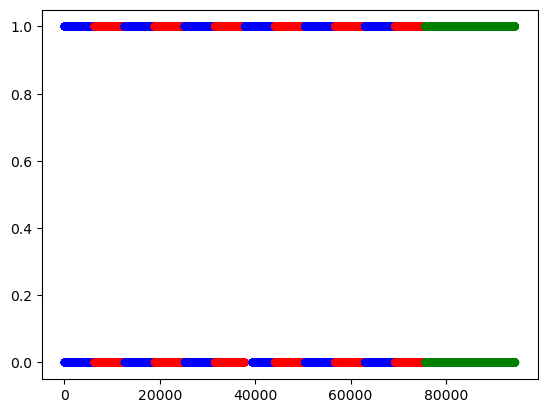

In [173]:
# Define the number of clusters
kmeans = KMeans(n_clusters=3)

# Fit the k-means model
kmeans.fit(df_imputed)

# Get the predicted cluster labels
y_pred = kmeans.labels_

# Visualisation
colormap = np.array(["red", "green", "blue"])
plt.scatter( np.arange(len(df)),df.filtered_values, c=colormap[y_pred], s=20)
plt.show()

In [174]:
y_pred

array([2, 2, 2, ..., 1, 1, 1])

In [175]:
y_pred_matrix = y_pred.reshape(4728, 20)
y_pred_matrix

array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

UN SIMULATEUR DE RADAR POUR DETECTEE LES BATEAUX

In [176]:
x=df.Range[:100]
x

0      0.904523
1      1.206030
2      1.507540
3      1.809050
4      2.110550
        ...    
95    29.547700
96    29.849200
97    30.150800
98    30.452300
99    30.753800
Name: Range, Length: 100, dtype: float64

In [177]:
Y = df.Detection_Probability[:100]/100
Y

0     0.971050
1     0.999959
2     0.999913
3     0.890591
4     0.999015
        ...   
95   -1.000000
96   -1.000000
97   -1.000000
98   -1.000000
99    0.000001
Name: Detection_Probability, Length: 100, dtype: float64

In [178]:
import numpy as np

# your data
x = pd.Series(x)
y = pd.Series(Y)

# create matrix
matrix = np.column_stack((x, y))

print(matrix)

[[ 9.04523e-01  9.71050e-01]
 [ 1.20603e+00  9.99959e-01]
 [ 1.50754e+00  9.99913e-01]
 [ 1.80905e+00  8.90591e-01]
 [ 2.11055e+00  9.99015e-01]
 [ 2.41206e+00  9.99886e-01]
 [ 2.71357e+00  9.99937e-01]
 [ 3.01508e+00  9.99942e-01]
 [ 3.31658e+00  9.99931e-01]
 [ 3.61809e+00  9.99909e-01]
 [ 3.91960e+00  9.99873e-01]
 [ 4.22111e+00  9.99817e-01]
 [ 4.52261e+00  9.99732e-01]
 [ 4.82412e+00  9.99606e-01]
 [ 5.12563e+00  9.99421e-01]
 [ 5.42714e+00  9.99154e-01]
 [ 5.72864e+00  9.98769e-01]
 [ 6.03015e+00  9.98224e-01]
 [ 6.33166e+00  9.97455e-01]
 [ 6.63317e+00  9.96381e-01]
 [ 6.93467e+00 -1.00000e+00]
 [ 7.23618e+00 -1.00000e+00]
 [ 7.53769e+00 -1.00000e+00]
 [ 7.83920e+00 -1.00000e+00]
 [ 8.14070e+00 -1.00000e+00]
 [ 8.44221e+00  1.98281e-02]
 [ 8.74372e+00  3.82214e-01]
 [ 9.04523e+00  7.31803e-01]
 [ 9.34673e+00  8.52758e-01]
 [ 9.64824e+00  8.80991e-01]
 [ 9.94975e+00  8.74160e-01]
 [ 1.02513e+01  8.49816e-01]
 [ 1.05528e+01  8.12955e-01]
 [ 1.08543e+01  7.64726e-01]
 [ 1.11558e+01

In [179]:
x = np.array(matrix[:,0])
y = np.array(matrix[:,1])

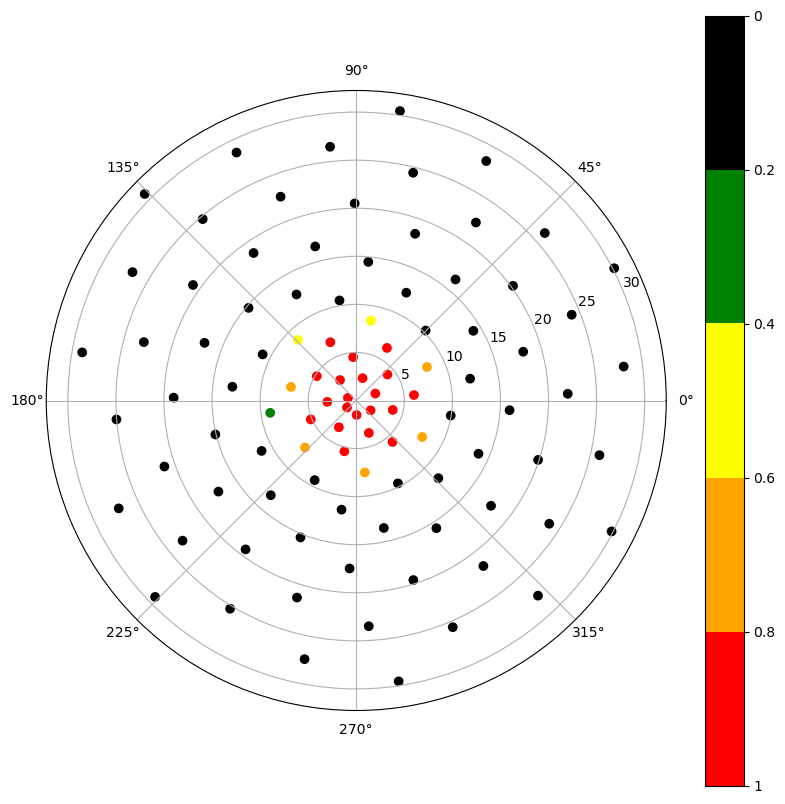

In [180]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# assume `matrix` is already defined as a numpy array

# set the x and y values
x = np.array(matrix[:,0])
y = np.array(matrix[:,1])

# create a list of colors based on y values
colors=[]
for val in x:
    if 0 <= val <= 6.7:
        colors.append(0)
    elif 6.7 < val <= 8.2:
        colors.append(0.2)
    elif 8.3 < val <= 8.8:
        colors.append(0.4)
    elif 8.8 < val <= 9.1:
        colors.append(0.6)
    elif  9.1<val<10.6:
        colors.append(0.8)
    
    else:
        colors.append(1)

# create a color map
cmap = ListedColormap(['red', 'orange','yellow','green','black'])

# convert x to radians
theta = x* np.pi / 1.0

# plot the scatter plot in a polar coordinate system
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='polar')
sc = ax.scatter(theta, x, c=colors, cmap=cmap)

# create a colorbar for the scatter plot
cb = plt.colorbar(sc, ticks=[0, 0.2, 0.4, 0.6, 0.8, 1])
cb.ax.set_yticklabels(['1','0.8','0.6','0.4','0.2','0'])



# show the plot
plt.show()
